## Dataset Information
- Cats and Dogs dataset contains 1000 images out of which 500 images are of cat
and same for the dog.

In [1]:
import os
from skimage.io import imread # To read an image file into a NumPy array.
from skimage.transform import resize # To resize an image to a specific shape (height, width).
from PIL import Image # For image processing and manipulation, and to open/save/display images using the Pillow library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
input_dir = "/content/drive/MyDrive/Colab Notebooks/Cats_Dogs"

In [3]:
categories = ["cats","dogs"] # names of folders containing images

for category in categories:
  # os.listdir - print a list of names of all the files present in the specified path.
  for file in os.listdir(os.path.join(input_dir,category)):
    # os.path.join - return a combined path by merging arguments.
    img_path = os.path.join(input_dir,category,file)
    print(img_path)

/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.102.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.101.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.106.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.105.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.100.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.10.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.0.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.103.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.104.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.1.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.148.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.146.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.15.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.141.jpg
/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.135.jpg
/content/drive/M

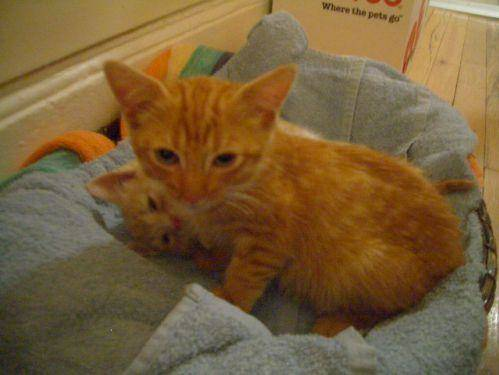

In [4]:
# taking a random path from above to display a sample image
Image.open("/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.456.jpg")

In [5]:
img_path = "/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.456.jpg"
# Converting a sample image to numpy array
img = imread(img_path)
print(img)

[[[103  85  39]
  [104  86  40]
  [105  86  43]
  ...
  [166 157 126]
  [154 145 114]
  [145 136 105]]

 [[104  86  40]
  [104  86  40]
  [105  87  41]
  ...
  [166 157 126]
  [153 147 115]
  [146 137 106]]

 [[104  86  38]
  [105  87  39]
  [106  88  42]
  ...
  [168 162 130]
  [156 151 121]
  [150 143 114]]

 ...

 [[ 46  49  22]
  [ 45  47  25]
  [ 46  47  31]
  ...
  [104  87  57]
  [103  87  61]
  [102  86  60]]

 [[ 44  47  20]
  [ 43  45  23]
  [ 43  44  28]
  ...
  [103  86  56]
  [101  85  59]
  [100  84  58]]

 [[ 44  47  20]
  [ 43  45  23]
  [ 41  42  26]
  ...
  [102  85  55]
  [101  84  58]
  [100  83  57]]]


In [6]:
# image array after flattening
img = resize(img,(15,15))
img = img.flatten()
img

array([0.47385758, 0.40149214, 0.20147791, 0.53022871, 0.44741294,
       0.24520317, 0.58545097, 0.48710324, 0.27566785, 0.62710806,
       0.51815256, 0.29124195, 0.64172095, 0.52057502, 0.27424232,
       0.66842068, 0.53856731, 0.29827559, 0.69798826, 0.56103617,
       0.3219379 , 0.65358241, 0.52866638, 0.30866384, 0.61076604,
       0.51299747, 0.33641541, 0.64499313, 0.51347365, 0.30276256,
       0.62424063, 0.48278118, 0.27811092, 0.62139493, 0.46321389,
       0.26610707, 0.67837591, 0.54402328, 0.35604781, 0.74663175,
       0.67235653, 0.51013339, 0.73082098, 0.6940294 , 0.56995752,
       0.49344345, 0.41369106, 0.21749791, 0.54536517, 0.44833017,
       0.25179354, 0.58260581, 0.47499754, 0.27355419, 0.62120753,
       0.49946751, 0.2849969 , 0.6771645 , 0.53446213, 0.29811716,
       0.68757624, 0.545381  , 0.30141622, 0.63023469, 0.50981134,
       0.28462633, 0.55398464, 0.45619121, 0.2839543 , 0.52791347,
       0.46546104, 0.34402763, 0.63168674, 0.51363926, 0.33259

## **Model Bilding**

### Converting images into acceptable data formate and creating labels

In [7]:
# creating data and labels list
data = []
labels = []

In [8]:
for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path = os.path.join(input_dir,category,file)
    img = imread(img_path) # its a numpy array
    img = resize(img,(15,15))
    img = img.flatten()
    data.append(img)
    labels.append(category_idx)
# Category_idx is 0 and 1 so labels contains two categories 0(Cat) and 1(Dog)

In [9]:
labels = np.asarray(labels)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
data = np.asarray(data)
data

array([[0.56470158, 0.5097052 , 0.45872916, ..., 0.68021869, 0.61260677,
        0.58107632],
       [0.28548271, 0.99640995, 0.99730871, ..., 0.56246329, 0.86430053,
        0.83962388],
       [0.28744055, 0.26029571, 0.21627677, ..., 0.66988112, 0.70648317,
        0.70956435],
       ...,
       [0.27651281, 0.38414166, 0.18510674, ..., 0.35092206, 0.41865907,
        0.24345746],
       [0.35933053, 0.31442215, 0.32091633, ..., 0.22610413, 0.22433971,
        0.22099868],
       [0.83066481, 0.74287718, 0.69557758, ..., 0.99304451, 0.99359508,
        0.98888301]])

In [11]:
data.max(),data.min()

(np.float64(1.0), np.float64(8.425871891719632e-08))

### **Data Splitting**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,shuffle = True, stratify=labels)
# stratify=labels: It ensures that the distribution of classes in labels is the same in both the training and testing sets.

### **Logistic Regression**

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy score of logistic regression model :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score of logistic regression model : 0.5825
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       200
           1       0.59      0.55      0.57       200

    accuracy                           0.58       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.58      0.58      0.58       400



### **Decision Tree**

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print("Accuracy score of Decision Tree model :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score of Decision Tree model : 0.555
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       200
           1       0.56      0.54      0.55       200

    accuracy                           0.56       400
   macro avg       0.56      0.55      0.55       400
weighted avg       0.56      0.56      0.55       400



### **Random Forest**

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print("Accuracy score of Random Forest model :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score of Random Forest model : 0.635
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       200
           1       0.65      0.59      0.62       200

    accuracy                           0.64       400
   macro avg       0.64      0.64      0.63       400
weighted avg       0.64      0.64      0.63       400



#### Hyperparameter tuning on Random forest model

In [19]:
model = RandomForestClassifier(random_state=42)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': [200, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,       # Only try 30 random combinations
    cv=2,
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search.fit(x_train, y_train)
random_search.best_params_

Fitting 2 folds for each of 30 candidates, totalling 60 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [20]:
# Use best parameters from RandomizedSearchCV
model1 = RandomForestClassifier(**random_search.best_params_, random_state=42)
model1.fit(x_train, y_train)

# Predict on test set
y_pred = model1.predict(x_test)

# Evaluation
print("Accuracy score of Random Forest model:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score of Random Forest model: 0.63
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       200
           1       0.62      0.68      0.65       200

    accuracy                           0.63       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.63      0.63      0.63       400



**Note - We have trained 1000 images of
cats and dogs. Increase in sample image
will lead to increase in accuracy.**

In [21]:
pd.DataFrame({"Actual_Value" : y_test, "Predicted_Value" : y_pred})

,Actual_Value,Predicted_Value
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0
...,...,...
395,1,1
396,0,0
397,0,1
398,1,1
